## STEP1: IMPORTING THE NECESSARY LIBRARIES 

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
from sklearn.model_selection import train_test_split

## STEP2: DATA LOADING AND PRE-PROCESSING

In [4]:
train = pd.read_csv('S_train.csv')
test = pd.read_csv('S_test.csv')

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## This Code Checks for No. of Passengers Transported Vs Not Transported And also Checks for duplicate value in the Dataset

In [10]:
print('No. of duplicated values at the the whole dataset is: ',train.duplicated().sum())
train['Transported'].value_counts()

No. of duplicated values at the the whole dataset is:  0


True     4378
False    4315
Name: Transported, dtype: int64

### We can therefore deduce that our dataset has no duplicate value and approximately equal ratio of No. of passengers Transported as against not Transported

## STEP3: EXPLORATORY DATA ANALYSIS (EDA) 
## The analysis is done on the feature dataset to get more insight on the relationship with the target variable 


## Analysis on PassengerId Column

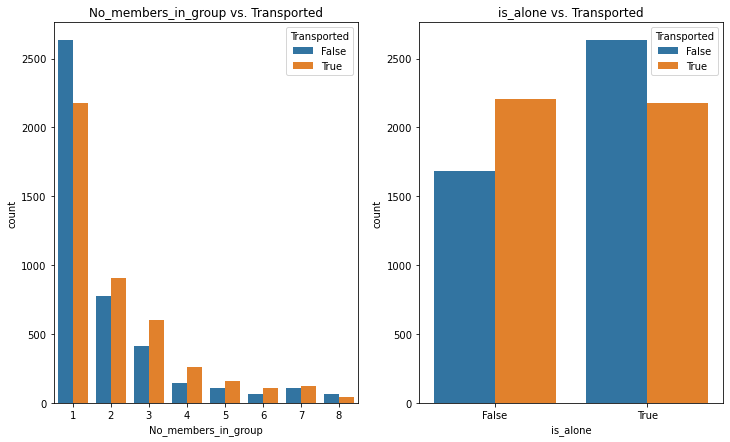

In [11]:
train[['Group','Member']] = train['PassengerId'].str.split('_',expand=True) #This code split PassengerId to Group, Member

x = train.groupby('Group')['Member'].count().sort_values(ascending=False)   #This code count members at each group

train['is_alone'] = train['Group'].apply(lambda y: y not in set(x[x>1].index))  #create new column for groups that have member > 1

train['No_members_in_group'] = 0      #This code create new column for number of members in each group
for i in x.items():
    train.loc[train['Group'] == i[0],'No_members_in_group'] = i[1]
    
plt.figure(figsize=[12,7])

plt.subplot(1,2,1)
sns.countplot(data=train, x= 'No_members_in_group',hue='Transported')
plt.title('No_members_in_group vs. Transported')

plt.subplot(1,2,2)
sns.countplot(data=train, x= 'is_alone',hue='Transported') 
plt.title('is_alone vs. Transported')

plt.show()

### Deduction from the Plot above: This shows that of the passengers are travelling single as against in group

## Analysis on Name Column 

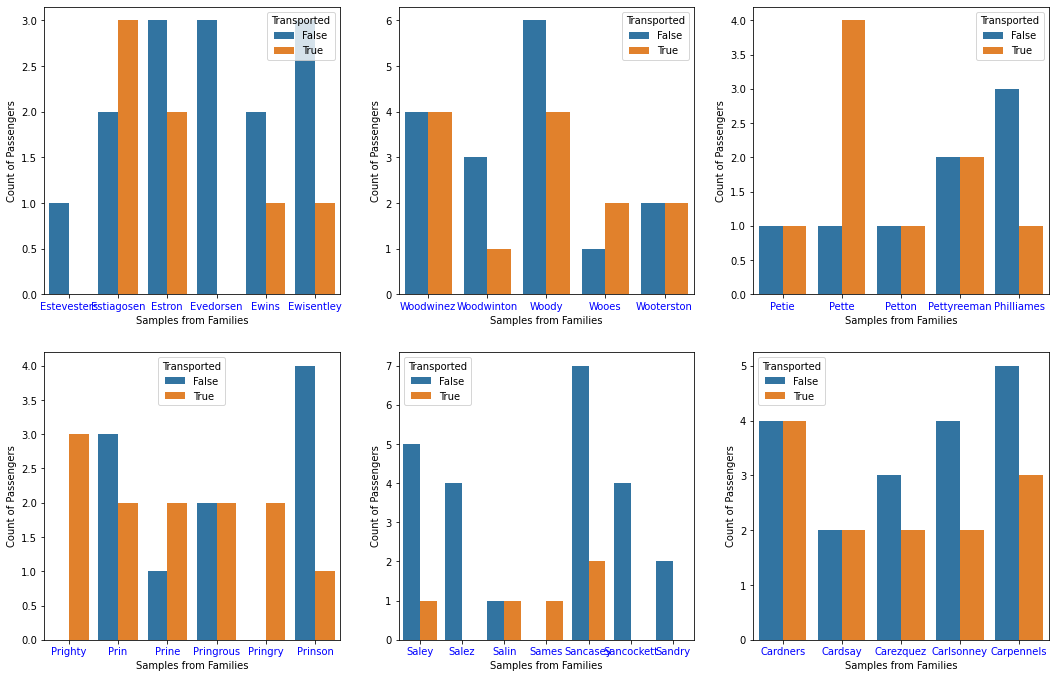

In [12]:
train['surname'] = train['Name'].str.split(' ',expand=True)[1]
df_surname_grouped = train.groupby(['surname','Transported'])['PassengerId'].count()
df_surname_grouped = df_surname_grouped.reset_index()
df_surname_grouped.rename({'surname':'Family Name','PassengerId':'Count of Passengers'},axis=1,inplace=True)


plt.figure(figsize=[18,18])
j=1
for i in np.random.randint(0,df_surname_grouped.shape[0],6):
    plt.subplot(3,3,j)
    if df_surname_grouped.iloc[i,1] == False:
        sns.barplot(data=df_surname_grouped[i:i+10],x='Family Name',y='Count of Passengers',hue='Transported')
        plt.xlabel('Samples from Families')
        plt.xticks(color='b')
    else:
        sns.barplot(data=df_surname_grouped[i+1:i+11],x='Family Name',y='Count of Passengers',hue='Transported')
        plt.xlabel('Samples from Families')
        plt.xticks(color='b')
    
    j+=1    
plt.show()

### Deduction From The Plot above: The Number of family member (increase) does not indicate an increased chance of being Transported

## Checking for Relationship between HomePlanet, CryoSleep, Destination, & VIP Columns with the Target Column

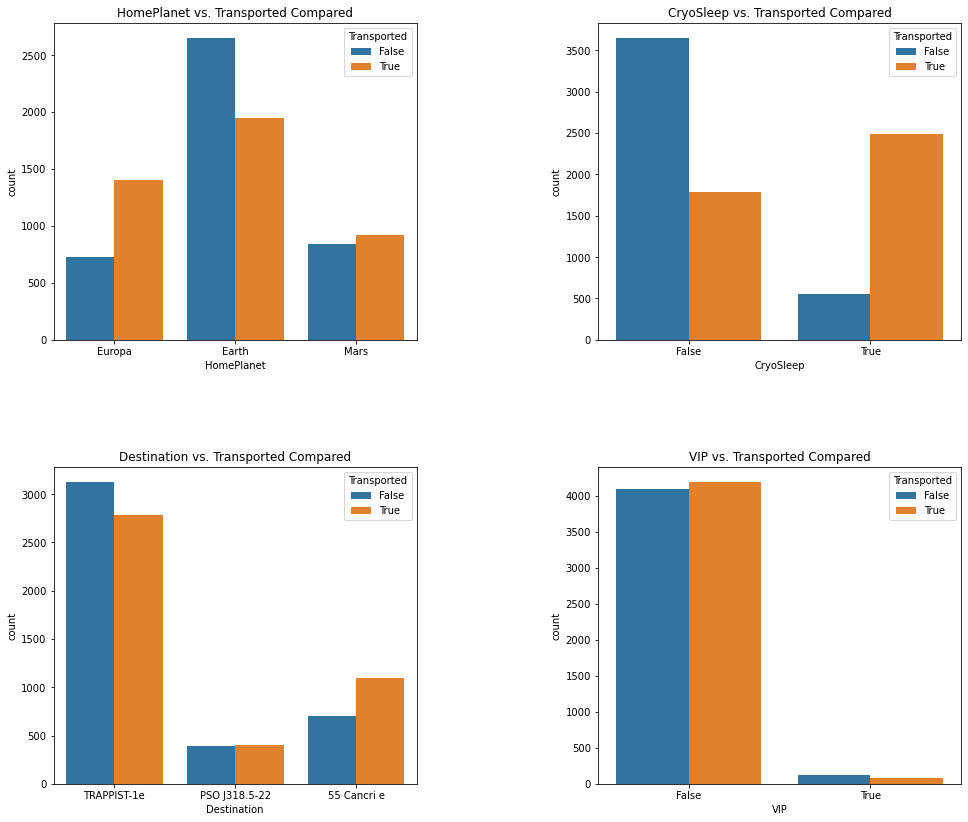

In [13]:
plt.figure(figsize=[14,14])
plt.subplot(2,2,1)
sns.countplot(data=train,x='HomePlanet',hue='Transported')
plt.title('HomePlanet vs. Transported Compared')

plt.subplot(2,2,2)
sns.countplot(data=train,x='CryoSleep',hue='Transported')
plt.title('CryoSleep vs. Transported Compared')

plt.subplot(2,2,3)
sns.countplot(data=train,x='Destination',hue='Transported')
plt.title('Destination vs. Transported Compared')

plt.subplot(2,2,4)
sns.countplot(data=train,x='VIP',hue='Transported')
plt.title('VIP vs. Transported Compared')

plt.subplots_adjust(left=0.6,right=1.5,wspace=0.5,hspace=0.4)
plt.show()

### Deduction from the Plot above: 1. Most of the passengers in suspended animation(cryosleep) has high chance of being transported   2. A good number of the passengers were from Earth        3.TRAPPIST-Ie were most of the passengers destination      4. No clear difference between the ratio of VIP Passengers Transported as against those that are not 

## Number Count of Passengers 'Transported' as against 'Not Transported' 

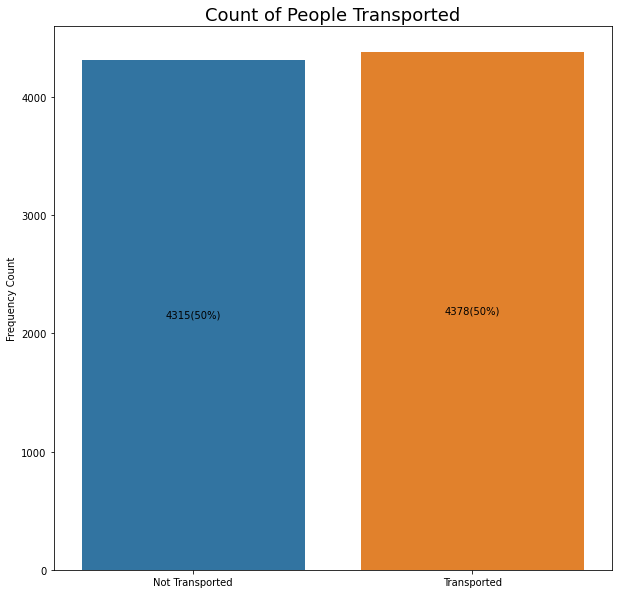

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    x= train["Transported"].value_counts().index, y=train["Transported"].value_counts(), 
    data=train
)

ax.set_xticklabels(['Not Transported', 'Transported'])
ax.set_ylabel("Frequency Count")
ax.set_title("Count of People Transported", fontsize=18)

for bar in ax.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    ax.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' +
        '{:.0%}'.format(bar.get_height() / len(train.Transported)) + ')',
        horizontalalignment='center', verticalalignment='center', color='black'
    )

## Analysis on Cabin Column

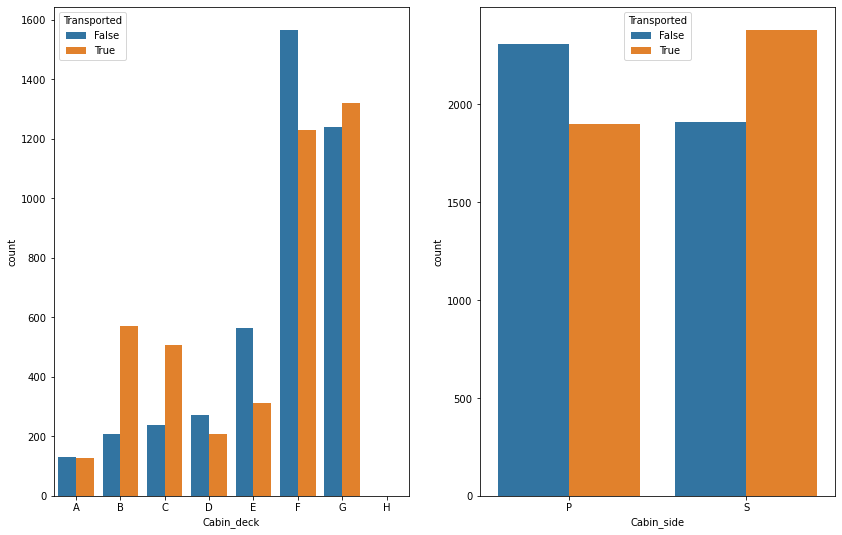

In [15]:
train[["Cabin_deck","Cabin_no.","Cabin_side"]]=train["Cabin"].str.split("/",expand=True)

plt.figure(figsize=[14,9])

plt.subplot(1,2,1)

sns.countplot(data=train,x='Cabin_deck',hue='Transported',order=['A','B','C','D','E','F','G','H'])

plt.subplot(1,2,2)

sns.countplot(data=train,x='Cabin_side',hue='Transported')
plt.show()

### Deduction from the Plot above: 1. Most of the passengers were sitting in cabin_deck F & G                                2. Number of passengers not Transported at cabin_deck (D,E,F) is greater than Transported ones at the same decks espicially who were setting at Cabinet Side P--- Decks (D,E,F) which indicate that Side P seem to be the most dangerous decks/side

## Analysis on Age Column

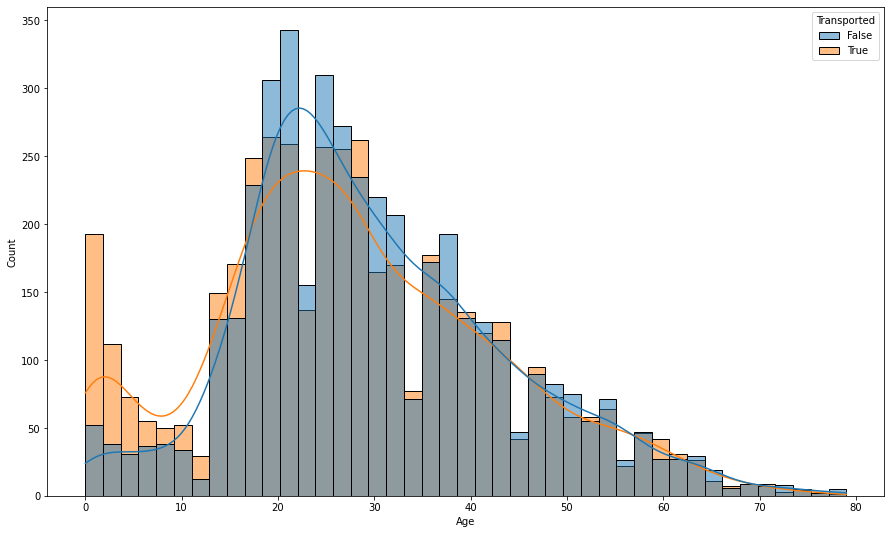

In [16]:
plt.figure(figsize=[15,9])
sns.histplot(data=train,x='Age',hue='Transported',kde=True)
plt.show()

### Deductions from the Plot above: 1. Most of the passengers were betwwen the age range 18 - 32.   2. For ages > 40, the number of Transported passengers are almost the same  as of not Tranported ones.

## STEP4: Handling (Filling) Missing Data

In [17]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Group,Member,is_alone,No_members_in_group,surname,Cabin_deck,Cabin_no.,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0001,01,True,1,Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,0002,01,True,1,Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,0003,01,False,2,Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,0003,02,False,2,Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,0004,01,True,1,Santantines,F,1,S


In [18]:
train.isnull().sum()

PassengerId              0
HomePlanet             201
CryoSleep              217
Cabin                  199
Destination            182
Age                    179
VIP                    203
RoomService            181
FoodCourt              183
ShoppingMall           208
Spa                    183
VRDeck                 188
Name                   200
Transported              0
Group                    0
Member                   0
is_alone                 0
No_members_in_group      0
surname                200
Cabin_deck             199
Cabin_no.              199
Cabin_side             199
dtype: int64

### The numerical columns with missing values will be filled with the MEDIAN value while the categorical column filled with the MODE

In [19]:
numeriacl_cols=['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


categoriacl_cols=['HomePlanet', 'CryoSleep', 'Destination','VIP', 
                  'surname','Name','Cabin', 'Cabin_deck', 'Cabin_no.','Cabin_side']

def fill_missing(df):
    
    for ft in categoriacl_cols:
        df[ft].fillna(df[ft].mode()[0],inplace=True)
        
    for ft in numeriacl_cols:
        df[ft].fillna(df[ft].median(),inplace=True)
        
    return df

fill_missing(train)
train.isna().any()

PassengerId            False
HomePlanet             False
CryoSleep              False
Cabin                  False
Destination            False
Age                    False
VIP                    False
RoomService            False
FoodCourt              False
ShoppingMall           False
Spa                    False
VRDeck                 False
Name                   False
Transported            False
Group                  False
Member                 False
is_alone               False
No_members_in_group    False
surname                False
Cabin_deck             False
Cabin_no.              False
Cabin_side             False
dtype: bool

In [20]:
train.isnull().sum()

PassengerId            0
HomePlanet             0
CryoSleep              0
Cabin                  0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Name                   0
Transported            0
Group                  0
Member                 0
is_alone               0
No_members_in_group    0
surname                0
Cabin_deck             0
Cabin_no.              0
Cabin_side             0
dtype: int64

## DROPPING 'CABIN_SIDE' COLUMN FROM THE TRAIN DATA

In [21]:
cols_drop = ['Cabin_side']
train = train.drop(cols_drop, axis = 1)

## Converting Train Categorical Data To Numerical Data

In [22]:
train['HomePlanet'] = train['HomePlanet'].astype('category').cat.codes

train['CryoSleep'] = train['CryoSleep'].astype('category').cat.codes

train['Destination'] = train['Destination'].astype('category').cat.codes

train['VIP'] = train['VIP'].astype('category').cat.codes

train['Member'] = train['Member'].astype('category').cat.codes

train['is_alone'] = train['is_alone'].astype('category').cat.codes

train['surname'] = train['surname'].astype('category').cat.codes

train['Cabin_deck'] = train['Cabin_deck'].astype('category').cat.codes

train['Cabin_no.'] = train['Cabin_no.'].astype('category').cat.codes

train['Cabin'] = train['Cabin'].astype('category').cat.codes

train['Name'] = train['Name'].astype('category').cat.codes

train['Transported'] = train['Transported'].astype('category').cat.codes

train['Group'] = train['Group'].astype('category').cat.codes

train['PassengerId'] = train['PassengerId'].astype('category').cat.codes



In [23]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Group,Member,is_alone,No_members_in_group,surname,Cabin_deck,Cabin_no.
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,...,0.0,5252,0,0,0,1,1,1431,1,0
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,...,44.0,4502,1,1,0,1,1,2109,5,0
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,...,49.0,457,0,2,0,0,2,1990,0,0
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,...,193.0,7149,0,2,1,0,2,1990,0,0
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,...,2.0,8319,1,3,0,1,1,1778,5,1


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          8693 non-null   int16  
 1   HomePlanet           8693 non-null   int8   
 2   CryoSleep            8693 non-null   int8   
 3   Cabin                8693 non-null   int16  
 4   Destination          8693 non-null   int8   
 5   Age                  8693 non-null   float64
 6   VIP                  8693 non-null   int8   
 7   RoomService          8693 non-null   float64
 8   FoodCourt            8693 non-null   float64
 9   ShoppingMall         8693 non-null   float64
 10  Spa                  8693 non-null   float64
 11  VRDeck               8693 non-null   float64
 12  Name                 8693 non-null   int16  
 13  Transported          8693 non-null   int8   
 14  Group                8693 non-null   int16  
 15  Member               8693 non-null   i

# TEST DATA

In [25]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## REPLICATING GROUPS CREATED ON THE TRAIN DATA TO THE TEST DATA

In [26]:
test[['Group','Member']] = test['PassengerId'].str.split('_',expand=True) #This code split PassengerId to Group, Member

x = test.groupby('Group')['Member'].count().sort_values(ascending=False)   #This code count members at each group

test['is_alone'] = test['Group'].apply(lambda y: y not in set(x[x>1].index))  #create new column for groups that have member > 1

test['No_members_in_group'] = 0      #This code create new column for number of members in each group
for i in x.items():
    test.loc[test['Group'] == i[0],'No_members_in_group'] = i[1]

In [27]:
test['surname'] = test['Name'].str.split(' ',expand=True)[1]
df_surname_grouped = test.groupby(['surname'])['PassengerId'].count()
df_surname_grouped = df_surname_grouped.reset_index()
df_surname_grouped.rename({'surname':'Family Name','PassengerId':'Count of Passengers'},axis=1,inplace=True)


test[["Cabin_deck","Cabin_no.","Cabin_side"]]=test["Cabin"].str.split("/",expand=True)


In [28]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Group,Member,is_alone,No_members_in_group,surname,Cabin_deck,Cabin_no.,Cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0.0,Nelly Carsoning,0013,01,True,1,Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0.0,Lerome Peckers,0018,01,True,1,Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,0019,01,True,1,Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,0021,01,True,1,Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0.0,Brence Harperez,0023,01,True,1,Harperez,F,5,S


In [29]:
test.isnull().sum()

PassengerId              0
HomePlanet              87
CryoSleep               93
Cabin                  100
Destination             92
Age                     91
VIP                     93
RoomService             82
FoodCourt              106
ShoppingMall            98
Spa                    101
VRDeck                  80
Name                    94
Group                    0
Member                   0
is_alone                 0
No_members_in_group      0
surname                 94
Cabin_deck             100
Cabin_no.              100
Cabin_side             100
dtype: int64

### The Missing Data above will the Filled in the Dataset.
###  The numerical columns with missing values will be filled with the MEDIAN value while the categorical column filled with the MODE

In [30]:
numeriacl_cols=['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


categoriacl_cols=['HomePlanet','CryoSleep','Destination','Cabin','VIP','Name','Cabin_side','Cabin_no.','surname','Cabin_deck']

def fill_missing(df):
    
    for ft in categoriacl_cols:
        df[ft].fillna(df[ft].mode()[0],inplace=True)
        
    for ft in numeriacl_cols:
        df[ft].fillna(df[ft].median(),inplace=True)
        
    return df

fill_missing(test)
test.isna().any()

PassengerId            False
HomePlanet             False
CryoSleep              False
Cabin                  False
Destination            False
Age                    False
VIP                    False
RoomService            False
FoodCourt              False
ShoppingMall           False
Spa                    False
VRDeck                 False
Name                   False
Group                  False
Member                 False
is_alone               False
No_members_in_group    False
surname                False
Cabin_deck             False
Cabin_no.              False
Cabin_side             False
dtype: bool

In [31]:
test.isnull().sum()

PassengerId            0
HomePlanet             0
CryoSleep              0
Cabin                  0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Name                   0
Group                  0
Member                 0
is_alone               0
No_members_in_group    0
surname                0
Cabin_deck             0
Cabin_no.              0
Cabin_side             0
dtype: int64

## DROPPING PASSENGERId FROM THE TEST DATA

In [32]:
PassengerId= test['PassengerId']

In [33]:
cols_drop = ['PassengerId']
test = test.drop(cols_drop, axis = 1)

## Converting Test Categorical Data To Numerical Data

In [34]:
test['HomePlanet'] = test['HomePlanet'].astype('category').cat.codes

test['CryoSleep'] = test['CryoSleep'].astype('category').cat.codes

test['Destination'] = test['Destination'].astype('category').cat.codes

test['VIP'] = test['VIP'].astype('category').cat.codes

test['Cabin'] = test['Cabin'].astype('category').cat.codes

test['Name'] = test['Name'].astype('category').cat.codes

test['Cabin_side'] = test['Cabin_side'].astype('category').cat.codes

test['Cabin_no.'] = test['Cabin_no.'].astype('category').cat.codes

test['surname'] = test['surname'].astype('category').cat.codes

test['Cabin_deck'] = test['Cabin_deck'].astype('category').cat.codes

test['Group'] = test['Group'].astype('category').cat.codes

test['is_alone'] = test['is_alone'].astype('category').cat.codes

test['Member'] = test['Member'].astype('category').cat.codes



In [35]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Member,is_alone,No_members_in_group,surname,Cabin_deck,Cabin_no.,Cabin_side
0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0,2912,0,0,1,1,275,6,820,1
1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,2406,1,0,1,1,1190,5,927,1
2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0,3376,2,0,1,1,1604,2,0,1
3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2711,3,0,1,1,262,2,1,1
4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0,668,4,0,1,1,736,5,1029,1


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomePlanet           4277 non-null   int8   
 1   CryoSleep            4277 non-null   int8   
 2   Cabin                4277 non-null   int16  
 3   Destination          4277 non-null   int8   
 4   Age                  4277 non-null   float64
 5   VIP                  4277 non-null   int8   
 6   RoomService          4277 non-null   float64
 7   FoodCourt            4277 non-null   float64
 8   ShoppingMall         4277 non-null   float64
 9   Spa                  4277 non-null   float64
 10  VRDeck               4277 non-null   float64
 11  Name                 4277 non-null   int16  
 12  Group                4277 non-null   int16  
 13  Member               4277 non-null   int8   
 14  is_alone             4277 non-null   int8   
 15  No_members_in_group  4277 non-null   i

## STEP 5: MODELLING

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sfk


### Defining our Train and Feature Dataset

In [38]:
train_set = train.drop("Transported", axis=1)
train_set_trans = train["Transported"]

### Splitting our Data

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    train_set, train_set_trans,
    train_size=0.8, random_state=0
)

In [40]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6954, 20) (6954,)
(1739, 20) (1739,)


## LOGISTICREGRESSION MODEL

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()

logreg.fit(x_train, y_train)


pred = logreg.predict(x_test)


print("Accuracy: {}".format(round(accuracy_score(y_test, pred), 4)))

Accuracy: 0.7683


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## STOCHASTIC GRADIENENT (SGD) CLASSIFIER MODEL

In [42]:
from sklearn.linear_model import SGDClassifier
SGC = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, tol = None)
SGC.fit(x_train, y_train)
SGC_predict = SGC.predict(x_test)

SGC.score(x_train, y_train)

SG_Classifier = round(SGC.score(x_train, y_train), 4)

In [43]:
SGC.score(x_train, y_train)

0.6558815070463043

## RANDOM FOREST CLASSIFIER MODEL

In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(
    bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True
)

RFC.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=16,
                       n_estimators=140, random_state=42, warm_start=True)

In [45]:
RFC.score(x_train, y_train)

0.8412424503882657

# FROM THE RESULT OF THE DIFFERENT CLASSIFICATION MODEL TESTED, LOGISTICREGRESSION HAS THE BEST SCORE OF 84.1% AND WILL BE USED AS OUR MODEL

# STEP6: Loading And Saving Predicted Result to CSV File

In [46]:
RFC =RFC.predict(test)

In [47]:
RFC = RFC.astype(bool)

In [48]:
test_result = test.copy()

In [49]:
test_result['Transported'] = RFC


df =PassengerId


In [50]:
df = pd.concat([df, test_result[['Transported']]], axis = 1)

In [52]:
df.to_csv('Spaceship_Titanic_Predicted_Result.csv', header = True, index = False) #saves to CSV